# Simulation d'un champ gaussien par une décomposition de Karhunen-Loeve





## Décomposition de Karhunen-Loeve (KL) d'un processus

Soit $n$ et $d$ deux entiers non nuls

Soit $(\Omega,\mathcal{F},P)$ un espace probabilisé

Soit $D$ la fermeture d'un ouvert borné de $\mathbb{R}^n$ 

Soit $X=(X_t)_{t\in D}$ un processus centré d'ordre 2 continue en moyenne quadratique (m.q) à valeurs dans $\mathbb{R}^d$

Notons $C: D \times D\rightarrow M_d(\mathbb{R}) $ la fonction de covariance

Remarque: par l'hypothèse de continuité en m.q de $X$, on obtient alors que $C$ est continue sur $D \times D$ dans $M_d(\mathbb{R})$.


On suppose maintenant que:

- $C$ est un opérateur symétrique défini positif (i.e pour toute famille de points dans $D$ deux à deux distincts, $(x_i)_{i=1,\dots,N}$, la matrice $S \in M_{Nd}(\mathbb{R}) $ définie par bloc par $S_{i,j}=C(x_i,x_j)$ est symétrique définie positive)


- $ \int_{D^2} \| C(s,t) \|^2 \mathrm{d}s\mathrm{d}t < \infty $ où $\|.\|$ est la norme de Frobenius sur $M_d(\mathbb{R})$, $ds$ et $dt$ sont la mesure de Lebesgue sur $D$

Si on pose $ T_{C}: L^{2}(D,\mathbb{R}^{d}) \rightarrow L^{2}(D,\mathbb{R}^{d})$ l'opérateur de covariance, i.e 

$\forall f \in L^{2}(D,\mathbb{R}^{d})$, $ds$-presque partout $T_{C}(f)(s) = \int_{D} C(s,t).f(t)\mathrm{d}t $ (où . désigne le produit matriciel),

on supposera enfin que $T_{C}$ est bien injectif

### Alors sous ces hypothèses:

On dispose de $(\lambda_i)_{i \in \mathbb{N}}$ une suite de réels strictement positifs décroissante tendant vers 0 et de $(\phi_i)_{i \in \mathbb{N}}$ une base hilbertienne de $L^{2}(D,\mathbb{R}^{d})$  telles que: 

- $\forall i \in \mathbb{N},  T_{C}(\phi_i) = \lambda_i \phi_i$
- les $\phi_i$ sont des fonctions continues sur $D$

On dispose de $(b_i)_{i \in \mathbb{N}}$ une suite de variables aléatoires réelles dans $L^2(\Omega,\mathcal{F},P)$ vérifiant:

- $ \forall \omega \in \Omega, dt$-presque partout $X(t,\omega) =  \displaystyle\sum_{\substack{i\in \mathbb{N}}}b_{i}(\omega)\phi_i(t)$ 

(cette somme est aussi bien définie dans $L^2(D \times \Omega, dt \otimes dP, \mathbb{R}^{d})$ et on l'appelle représentation de Karhunen-Loeve de $X$)
- $ \forall i \in \mathbb{N}, \mathbb{E}(b_i) = 0 $
- $ \forall (i,j) \in \mathbb{N}^2, \mathbb{E}(b_{i}b_{j}) = \delta_{ij} \lambda_{i}$ 

Par conséquent si pour tout $i \in \mathbb{N}$, on réduit $b_i$ i.e on considère $a_i = \frac{b_i}{\sqrt{\lambda_{i}}}$, alors:
- $ (dt \otimes dP)(t,\omega)$-presque partout $X(t,\omega) = \displaystyle\sum_{\substack{i\in \mathbb{N}}}\sqrt{\lambda_{i}}a_{i}(\omega)\phi_i(t)$
- $ \forall i \in \mathbb{N}, \mathbb{E}(a_i) = 0 $
- $ \forall (i,j) \in \mathbb{N}^2, \mathbb{E}(a_{i}a_{j}) = \delta_{ij} $ 

## Cas d'un processus gaussien 

Maintenant on suppose en plus que $X$ est gaussien (et à trajectoires continues) 

On peut alors totalement décrire le processus $(a_i)_{i \in \mathbb{N}}$:

- les $a_{i}$ sont indépendants et identiquement distribuées selon une loi normale centrée réduite 
- $dP(\omega)$-presque sûrement, $ \displaystyle\sup_{t \in D} \| X(t,\omega) - \displaystyle\sum_{i=0}^{N-1}\sqrt{\lambda_{i}}a_{i}(\omega)\phi_i(t) \| \xrightarrow[N \to \infty]{} 0 $ (ici $\|.\|$ désigne la norme euclidienne de $\mathbb{R}^d$)

Par conséquent en définissant pour $N \in \mathbb{N}$ le processus $X_{N}$ ainsi:

 $ \forall (t,\omega) \in D \times \Omega, X_{N}(t,\omega) = \displaystyle\sum_{i=0}^{N-1}\sqrt{\lambda_{i}}a_{i}(\omega)\phi_i(t) $, 

on peut chercher à simuler le processus $X$ en simulant les processus $X_{N}$.

Si on connaît les valeurs et fonctions propres de l'opérateur de covariance $T_{C}$, on peut alors simuler $X_N$ en produisant un échantillon $(\alpha_{i})_{i \in  \{0,..,N-1 \} }$ de $N$ réalisations indépendantes d'une loi normale centrée réduite puis en associant pour tout $t \in D$ le vecteur $\displaystyle\sum_{i=0}^{N-1}\sqrt{\lambda_{i}}\alpha_{i}\phi_i(t)$. 

Par conséquent si on décide ce choix de simulation, le nerf du problème devient la détermination des $(\lambda_{i},\phi_{i})_{i \in \mathbb{N}}$, les valeurs et fonctions propres de l'opérateur de covariance.  De façon générale, il n'est pas possible de déterminer exactement $(\lambda_{i},\phi_{i})_{i \in \mathbb{N}}$ : on ne peut obtenir que des approximations. Dans ce qui suit, on présentera deux façons d'approximer un nombre limité $N$ de $(\lambda_{i},\phi_{i})_{i \in \mathbb{N}}$ afin de simuler un $X_N$


(Sources: OPENTURNS + Fogli )

# Cadre de l'introduction des deux méthodes

On va supposer que $D$ peut être décrit par une triangulation $M = (V,S)$ où $V$ est un ensemble de sommets $(V=(v_1, ..., v_L))$ dans $D$ et $S$ un ensemble de $n$-simplexes dont l'intersection de deux $n$-simplexes $S^1 = Conv(s^{1}_{0},...,s^{1}_{n})$ et $S^2 = Conv(s^{2}_{0},...,s^{2}_{n})$ vaut $ Conv(\{s^{1}_{0},...,s^{1}_{n}\} \cap \{s^{2}_{0},...,s^{2}_{n}\}) $

(où pour $A$ une partie de $\mathbb{R}^n$, $Conv(A)$ est l'enveloppe convexe de $A$ et les $s^{i}_{j}$ sont les sommets de $V$ décrivant leur $n$-simplexe respectif $S^i$)


On suppose aussi que chaque sommet de $V$ est le sommet d'au moins un des $n$-simplexes de $S$ et que l'union des $n$-simplexes engendre $D$

Pour déterminer les $(\lambda_{i},\phi_{i})_{i \in \mathbb{N}}$, on doit résoudre le problème suivant:

Trouver $(\lambda,\phi) \in \mathbb{R}_{+}^{*} \times L^{2}(D,\mathbb{R}^{d}) $ tel que:
- $\|\phi \|_{L^{2}(D,\mathbb{R}^{d})} =1 $
- $  T_{C}(\phi) = \lambda \phi$ i.e $\int_{D} C(s,t).\phi(t)\mathrm{d}t = \lambda \phi(s)$ pour $s \in D$

On appelle aussi ce problème dans la littérature mathématique le problème de Fredholm de seconde espèce. 



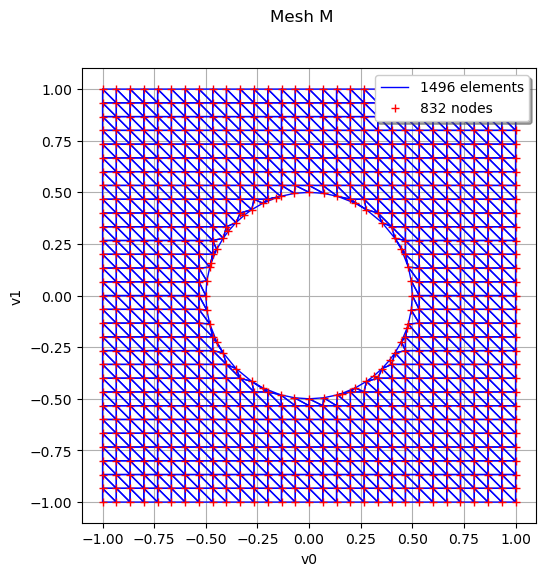

In [1]:
import openturns as ot
import openturns.viewer as otv
import numpy as np
from matplotlib import pyplot as plt
from testTool import *
from klGaussianProcess import *

#dimension d'entrée
inputDim = 2 
# Création d'un modèle de covariance
C = ot.MaternModel([0.2]*inputDim, 4)
# Création d'un maillage
f = ot.SymbolicFunction(["x","y"], ["1-sqrt(x^2+y^2)"])
levelSet = ot.LevelSet(f, ot.Less(), 0.5)
xMin = [-1.0]*inputDim
xMax = [1.0]*inputDim
M = ot.LevelSetMesher([30]*inputDim).build(levelSet, ot.Interval(xMin, xMax))
M.setName(r'M')
view = otv.View(M.draw(), (600,600), square_axes=True)
view

## Méthode P1-Lagrange

On va procéder à une projection du problème dans un sous-espace de $ {L^{2}(D,\mathbb{R}^{d})} $ de dimension finie de base notée $B$ afin d'obtenir une solution du problème non pas sur $ {L^{2}(D,\mathbb{R}^{d})} $ mais sur $Vect(B)$ : il s'agit de la méthode de Galerkin.

Dans le cadre de la méthode $P_1$-Lagrange et du maillage $M$ qui nous est fourni, on va utiliser la base fonctionnelle $P_1$-Lagrange associée au maillage $M$, $(\theta_1, ...,\theta_L)$ , où $L$ est le nombre de sommets dans $V$ et pour $i \in \{1,..,L\} $, $\theta_i \in {L^{2}(D,\mathbb{R})} $ est associé au sommet $v_i$

On définit alors la base $B$ de la façon suivante: 

- Si on note $(e_1,...,e_d)$ la base canonique de $\mathbb{R}^d$, on définit pour $ i \in \{1, ..., L\}$ et $m \in \{1, ..., d\}$, $ \psi^{i}_{m} = \theta_{i}.e_m \in {L^{2}(D,\mathbb{R}^{d})} $ 
- On obtient la base $B = (\psi^{i}_{m})_{(i,m) \in \{1,..,L\} \times \{1,..,d\} }$ que l'on peut noter $(\chi_{k})_{k\in \{1,..,Ld\}}$ où pour $ i \in \{1, ..., L\}$ et $m \in \{1, ..., d\}, \chi_{d(i-1)+m} = \psi^{i}_{m} $

En notant $V_{Ld} = Vect(B)$, la formulation du  problème de Fredholm devient: 

Trouver $(\lambda,\phi) \in \mathbb{R}_{+}^{*} \times V_{Ld} $ tel que:
- $\|\phi \|_{L^{2}(D,\mathbb{R}^{d})} =1 $
- $T_{C}(\phi) = \lambda \phi$ i.e $\int_{D} C(s,t).\phi(t)\mathrm{d}t = \lambda \phi(s)$ pour $s \in D$



Dans cette formulation, on note un souci:

Pour $f \in V_{Ld}$, rien ne garantit que $T_{C}(f) \in V_{Ld}$. Or si c'était le cas, le problème de Fredholm serait équivalent à résoudre un problème de nature matricielle. Par conséquent on remplacera la fonction de covariance $C$ du problème par $\tilde{C} \in L^2(D^2, M_d(\mathbb{R}), ds \otimes dt) $ son approximation dite $P_1 \times P_1$ définie ainsi: 

 - $\forall (s,t) \in D^2, \tilde{C}(s,t) = \displaystyle\sum_{\substack{(i,j) \in \{1,..,L\}^2}} \theta_{i}(s)\theta_{j}(t).C(v_{i},v_{j})  \in M_d(\mathbb{R}) $ (la matrice est symétrique)
 

Dans ce cas, pour $f \in V_{Ld}$, on montre que $T_{\tilde{C}}(f) \in V_{Ld}$ et que l'opérateur $T_{\tilde{C}}$ est auto-autoadjoint et défini positif sur $V_{Ld}$. 
Mais sur $ {L^{2}(D,\mathbb{R}^{d})} $, cet opérateur est autoadjoint et semi-défini positif, on ne peut pas dire plus).

Le problème devient finalement:

Trouver $(\lambda,\phi) \in \mathbb{R}_{+}^{*} \times V_{Ld} $ tel que:
- $\|\phi \|_{L^{2}(D,\mathbb{R}^{d})} =1 $
- $T_{\tilde{C}}(\phi) = \lambda \phi$ i.e $\int_{D} \tilde{C}(s,t).\phi(t)\mathrm{d}t = \lambda \phi(s)$ pour $s \in D$

Notons ce problème $P$

On obtient ainsi l'équivalent matriciel du problème:

Trouver $(\lambda,\phi) \in \mathbb{R}_{+}^{*} \times M_{Ld,1}(\mathbb{R})$ tel que:
- $\phi^{T}G \phi = 1 $ 
- $\mathcal{\tilde{C}}G\phi = \lambda\phi$

où $\phi$ est à voir comme la représentation d'un vecteur de $V_{Ld}$ dans la base $B$ = $(\chi_{k})_{k\in \{1,Ld\}}$

où $\mathcal{\tilde{C}} \in M_{Ld,Ld}(\mathbb{R})$ que l'on définit par bloc de matrices dans $M_{d}(\mathbb{R})$: 
- $ \forall (i,j) \in \{1,..,d\}^2, \mathcal{\tilde{C}}_{i,j} = C(v_{i}, v_{j}) \in M_{d}(\mathbb{R})$ (bloc $(i,j)$ de la matrice $\mathcal{\tilde{C}}$) 

et $G \in M_{Ld,Ld}(\mathbb{R})$ est définie à l'aide de la matrice de masse $\mathcal{G} \in M_{L}(\mathbb{R})$ i.e:
- $ \forall (k,l) \in \{1,..,L\}^2 ,  \mathcal{G}_{k,l} = \int_D \theta_{k}(t)\theta_{l}(t)\mathrm{d}t$
- Les coefficients de $G$ valent $0$ sauf pour les double-indices suivants: $\forall j \in \{1,..,d\}, \forall (k,l) \in \{1,..,L\}^2, G_{d(k-1)+j,d(l-1)+j} = \mathcal{G}_{k,l} $



Derrière la définition théorique de $G$, sa construction à partir de $\mathcal{G}$ se veut très visuelle. En effet la logique se veut être la suivante:

- $G$ est initialisée par la matrice nulle


- on considère la première colonne de $\mathcal{G}$,  $\mathcal{G}_1 $


- pour $i$ dans $\{1,..,L\}$, on place le $i$ème coefficient de $\mathcal{G}_1 $ à la $(1 + d(i-1))$ème position de la première colonne de $G$, $G_{1}$ (tous les coefficients de  $\mathcal{G}_1$ ont donc été espacés d'un pas de valeur $d$)


- on a $G_{1}$ et si $d>=2$ alors pour obtenir la colonne $G_{2}$, il suffit de décaler de 1 vers le bas tous les coefficients de la colonne $G_{1}$. Si $d>=3$, pour obtenir $G_{3}$, même logique, on décale de 1 vers le bas tous les coefficients de la colonne $G_{2}$. En répétant cette logique $d-1$ fois, on a ainsi défini les $d$ premières colonnes de $G$ 


- ensuite on va répéter la même logique qu'avant en considèrant la deuxème colonne de $\mathcal{G}$,  $\mathcal{G}_2 $


- pour $i$ dans $\{1,..,L\}$, on place le $i$ème coefficient de $\mathcal{G}_2 $ à la $(1 + d(i-1))$ème position de la $(d+1)$ème colonne de $G$, $G_{d+1}$ 


- on a $G_{d+1}$ et si $d>=2$ alors pour obtenir la colonne $G_{d+2}$, il suffit de décaler de 1 vers le bas tous les coefficients de la colonne $G_{d+1}$.  Si $d>=3$, pour obtenir $G_{d+3}$,même logique, on décale de 1 vers le bas tous les coefficients de la colonne $G_{d+2}$. En répétant cette logique $d-1$ fois on a maintenant réussi à définir les $2d$ premières colonnes de $G$


- et ainsi de suite on définit totalement $G$ en ayant parcouru toutes les colonnes de $\mathcal{G}$

On note ainsi que si $d=1$, alors $G=\mathcal{G}$



### Problème matriciel de valeurs propres :
    
Notre problème revient à déterminer les vecteurs et valeurs propres de la matrice carré de taille $Ld$,  $\mathcal{\tilde{C}}G$ , qui est symétrique définie positive car il s'agit de la représentation matricielle de l'opérateur $T_{\tilde{C}}$ autoadjoint et défini positif. Par conséquent on ne peut déterminer que $Ld$ valeurs propres (multiplicité prise en compte). 

Une fois que l'on a résolu le problème, on obtient donc une famille $(\lambda_i, \tilde{\phi}_i)_{i \in \{0,.., Ld-1\}} \in (\mathbb{R}^{*}_{+} \times M_{Ld,1}(\mathbb{R}))^{Ld}$  de couples de valeur propre-vecteur propre normalisé (i.e $\tilde{\phi}_{i}^{T}G\tilde{\phi}_{i} = 1$)  associés. On peut supposer que les $\lambda_i$ sont rangés dans l'ordre décroissant et que tous les vecteurs de la famille associés à une même valeur propre forment une famille orthonormée ($\tilde{\phi}_{i}^{T}G\tilde{\phi}_{j} = 0 $ pour $i \neq j$)  engendrant l'espace propre associé.

Ensuite pour obtenir une famille $(\lambda_i, \phi_i)_{i \in \{0,.., Ld-1\}}$ de solutions du problème $P$, il suffit pour tout $i$ dans $\{0,.., Ld-1\}$ de choisir comme $\phi_i$ le vecteur de $V_{Ld}$ associé à la répresentation matricielle  $\tilde{\phi}_i$ dans la base $B$

Si on revient à la simulation de notre processus gaussien $X$: pour $N \in \{0,.., Ld-1\}$, il sera possible de simuler $X$ en utilisant nos $(\lambda_i, \phi_i)$ nouvellement obtenus et en simulant un processus s'y rapprochant $X_N$ où:

- $\forall \omega \in \Omega, \forall t \in D, X_N(t,\omega) = \displaystyle\sum_{i=0}^{N}\sqrt{\lambda_{i}}a_{i}(\omega)\phi_i(t) $ (où les $a_{i}$ sont pour rappel les variables iid normales centrées)

Ainsi pour simuler $X_N$ informatiquement, on va produire un échantillon $(\alpha_{i})_{i \in  \{0,..,N\} }$ de $N+1$ réalisations indépendantes d'une loi centrée réduite puis on va associer pour tout sommet $t$ du maillage $M$ le vecteur $\displaystyle\sum_{i=0}^{N}\sqrt{\lambda_{i}}\alpha_{i}\phi_i(t)$

Il est possible de faire un choix quant au $N$ choisi pour la simulation à partir du concept de seuil. On appellera seuil tout simplement un réel $s$ entre $0$ exclus et $1$ inclus. Dans ce cas, on choisit $N$ comme l'entier vérifiant

$N =  \min \{k \in \{0,Ld -1\} / \displaystyle\sum_{i=0}^{k} \lambda_i  \geq (1-s)\displaystyle\sum_{i=0}^{Ld -1} \lambda_i \}$
    


(Sources: Openturns, peut-être évoquer une référence pour la description générique de la méthode P1-Lagrange)   

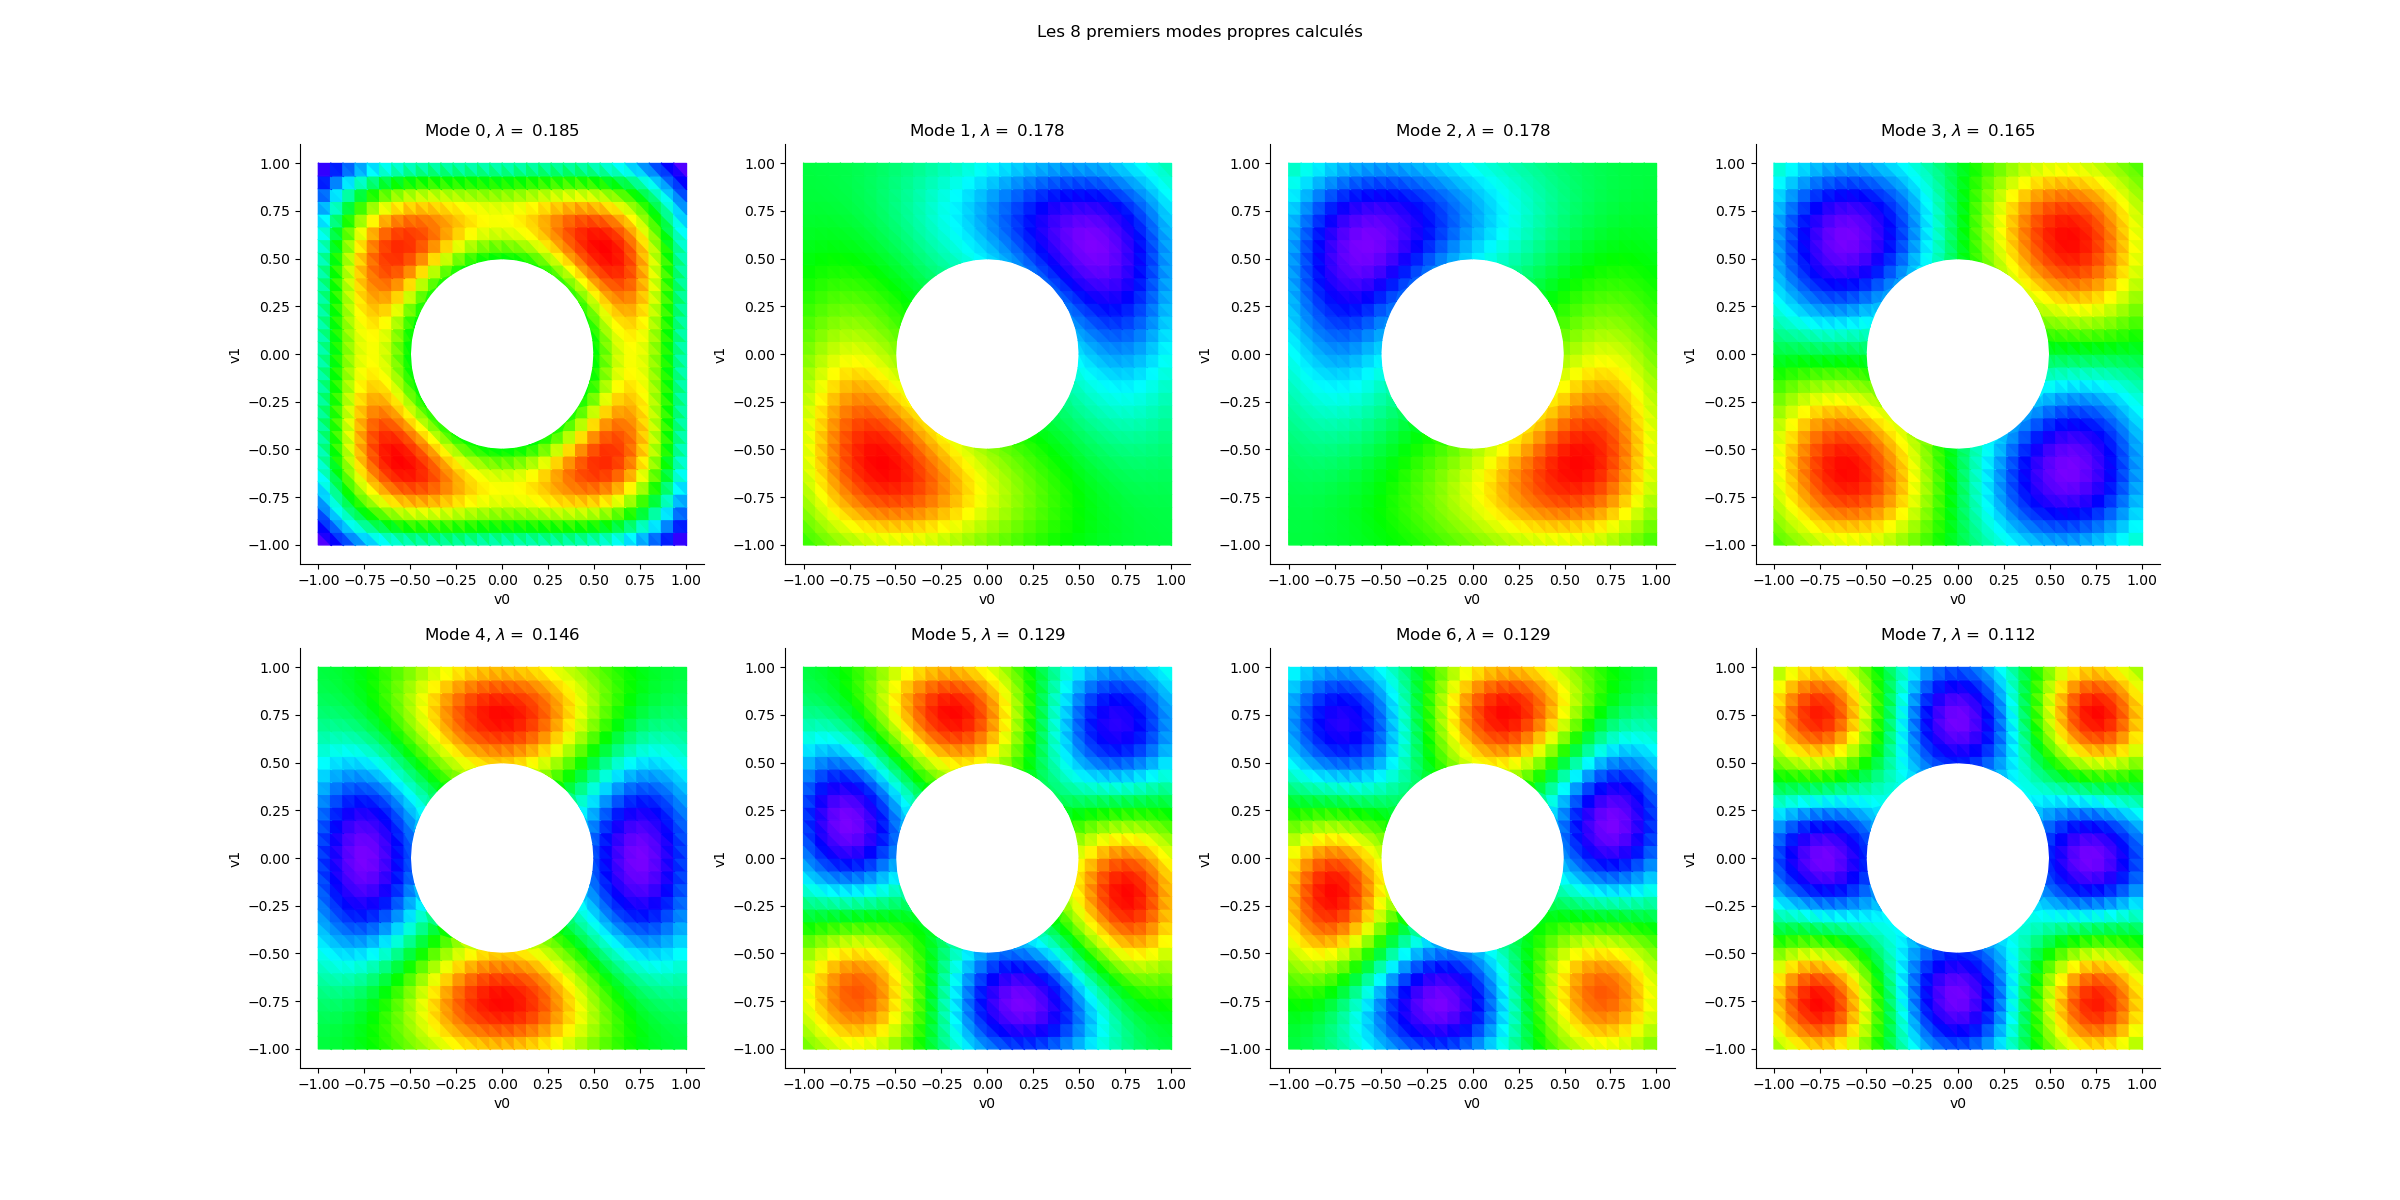

In [2]:
# Simulation gaussienne par résolution du problème de Fredholm (méthode P1 Lagrange)


#threshold décrit juste avant
s=0.1 #on le réutilisera plus loin pour la méthode de Nystrom de même que nbOfModes

#nb de modes calculés
nbOfModes = 0 #le cas 0 fait déterminer ce nombre via le threshold s


#processus gaussien simulé sur le maillage M
klP1 = KLP1AGaussianProcess(M, C, s, nbOfModes)

#réalisation du processus
fieldP1 = klP1.getRealization()

#résultats de la résolution du problème de Fredholm 
resultP1 = klP1.result


# Visualisation des 8 premiers modes propres
grid = ot.GridLayout(2, 4)
grid.setTitle("Les 8 premiers modes propres calculés")
for i in range(8):
    g = ot.Field(M, resultP1.getModesAsProcessSample()[i]).draw()
    lambda_i = resultP1.getEigenvalues()[i]
    g.setTitle(f"Mode {i}, $\lambda=$ {lambda_i:.3f}")
    grid.setGraph(i // 4, i % 4, g)
grid

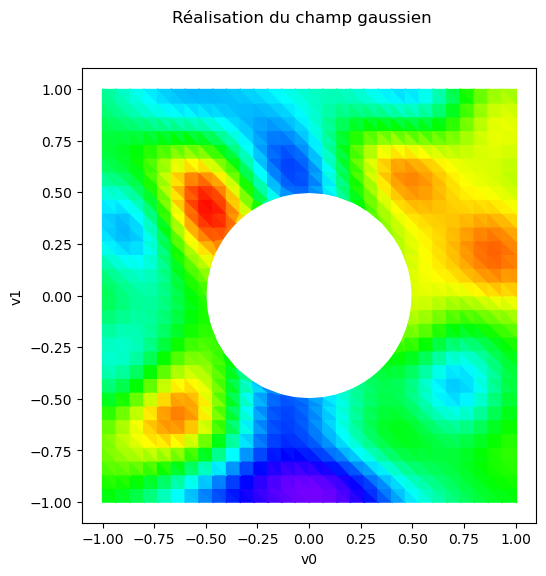

In [3]:
# Visualisation de la simulation effectuée sur le maillage M
g = fieldP1.draw()
g.setTitle(f"Réalisation du champ gaussien")
view = otv.View(g, (600,600), square_axes=True)

## Méthode de quadrature ou de Nyström

Rappelons le problème de Fredholm de seconde espèce qui est:

Trouver $(\lambda,\phi) \in \mathbb{R}_{+}^{*} \times L^{2}(D,\mathbb{R}^{d}) $ tel que:
- $\|\phi \|_{L^{2}(D,\mathbb{R}^{d})} =1 $
- $  T_{C}(\phi) = \lambda \phi$ i.e $\int_{D} C(s,t).\phi(t)\mathrm{d}t = \lambda \phi(s)$ pour $s \in D$

L'idée fondamentale de cette approche est d'approcher toute intégrale sur $D$ par une approximation de quadrature.
Pour être plus formel, on va d'abord introduire un pavé $A = [l_1, u_1] \times ... \times [l_n, u_n] \subset \mathbb{R}^n $ tel que $D \subset A$. Puis on introduit $\mu$ une mesure de probabilité sur $A$ à densité par rapport à la mesure de Lebesgue sur $A$. On notera abusivement la densité associée à $\mu$ aussi $\mu$ et on supposera que cette densité est continue et non nulle sur $A$ 

Dans ce cas, on introduit une approximation de quadrature $(\omega_{l}, \xi_{l})_{l \in \{1,L\}} \in (\mathbb{R}_{+} \times A)^{L}$  associée à la mesure $\mu$, c'est à dire que l'on s'attend à $\forall f \in L^1(A, \mu)$ tel que $f$ est continue sur $A$ (ou continue sur $D$ et à support dans $D$),
- $\int_{A} f(t)\mu(t)\mathrm{d}t   \approx\displaystyle\sum_{\substack{l \in \{1,..,L\}}} \omega_{l}f(\xi_{l})$



Alors on peut considérer pour 
$ l \in \{1,..,L\}, \eta_{l} = \omega_{l}\frac{1_{D}(\xi_{l})}{\mu(\xi_{l})}$ où $1_{D}$ est la fonction indicatrice du domaine $D$.
On a alors: 
- $\int_{D} f(t)\mathrm{d}t   \approx\displaystyle\sum_{\substack{l \in \{1,..,L\}}} \eta_{l}f(\xi_{l})$

$(\eta_{l}, \xi_{l})_{l \in \{1,L\}}$ sera l'approximation de quadrature effective utilisée par la suite.

On va ensuite appliquer une méthode de Galerkin sur $D$ pour approcher les solutions du problème de Fredholm et ici le nom de méthode de quadrature viendra du fait qu'à chaque fois qu'une intégrale sur $D$ apparaîtra dans les calculs, on approchera cette dernière par notre approximation de quadrature effective. 

Plus formellement, on considère d'abord une famille libre $(\theta_1, ...,\theta_P)$ d'éléments de $L^{2}(D,\mathbb{R})$: ce sera notre base fonctionnelle sur $L^{2}(D,\mathbb{R})$. Il s'agit en général de polynômes. On détaillera plus loin la possibilité de choisir des polynômes particuliers en fonction de la mesure $\mu$ afin d'obtenir une approximation de quadrature ayant certaines propriétés intéressantes. Puis on obtient $B$, notre base fonctionnelle sur $L^{2}(D,\mathbb{R}^d)$ de façon tout à fait similaire à ce qu'on a pu voir dans la méthode $P_1$-Lagrange:


- Si on note $(e_1,...,e_d)$ la base canonique de $\mathbb{R}^d$, on définit pour $ i \in \{1, ..., P\}$ et $m \in \{1, ..., d\}$, $ \psi^{i}_{m} = \theta_{i}.e_m \in {L^{2}(D,\mathbb{R}^{d})} $ 
- On obtient la base $B = (\psi^{i}_{m})_{(i,m) \in \{1,..,P\} \times \{1,..,d\} }$ que l'on peut noter $(\chi_{k})_{k\in \{1,..,Pd\}}$ où pour $ i \in \{1, ..., P\}$ et $m \in \{1, ..., d\}, \chi_{d(i-1)+m} = \psi^{i}_{m} $

En notant $V_{Pd} = Vect(B)$, la formulation du problème de Fredholm devient alors par projection: 

Trouver $(\lambda,\phi) \in \mathbb{R}_{+}^{*} \times V_{Pd} $ tel que:
- $\|\phi \|_{L^{2}(D,\mathbb{R}^{d})} =1 $
- $(P_{V_{Pd}} \circ T_{C})(\phi) = \lambda \phi$ où $P_{V_{Pd}}$ est la projection orthogonale de  $L^{2}(D,\mathbb{R}^d)$ sur $V_{Pd}$

Cette formulation est ainsi un problème dans un espace vectoriel de dimension finie. 

On peut remarquer que pour $v \in L^{2}(D,\mathbb{R}^d)$, $ w = P_{V_{Pd}}(v) $ est l'unique vecteur de $V_{Pd}$ vérifiant:

- $\forall k \in \{1,..,Pd\}, \int_{D} \langle v(t), \chi_k(t) \rangle_{d} \mathrm{d}t = \int_{D} \langle w(t), \chi_k(t) \rangle_{d} \mathrm{d}t $ 

    où $\langle .,.\rangle_{d}$ est le produit scalaire usuel sur $\mathbb{R}^d$
    
    

Par conséquent on obtient comme formulation équivalente:

Trouver $(\lambda,\phi) \in \mathbb{R}_{+}^{*} \times V_{Pd} $ tel que:
- $ \int_{D} \langle \phi(t),\phi(t) \rangle_{d} \mathrm{d}t= 1 $
- $ \forall k \in \{1,..,Pd\}, \int_{D} \langle \int_{D} C(t,s)\phi(s)\mathrm{d}s, \chi_k(t) \rangle_{d} \mathrm{d}t = \lambda \int_{D} \langle \phi(t), \chi_k(t) \rangle_{d} \mathrm{d}t $

On note ce problème $Pr$

Dans cette formulation, on peut enfin observer les intégrales sur $D$ qui seront remplacées par l'approximation de quadrature effective. 
On obtient finalement la version matricielle de ce problème:

Trouver $(\lambda,\phi) \in \mathbb{R}_{+}^{*} \times M_{Pd,1}(\mathbb{R}) $ tel que:
- $ \phi^{T}\Theta^{T} W \Theta\phi =  1 $
- $ \Theta^{T} W\tilde{C}W\Theta\phi = \lambda \Theta^{T} W\Theta\phi $

où $\Theta \in M_{Ld,Pd}(\mathbb{R})$ que l'on définit par bloc de matrices dans $M_{d}(\mathbb{R})$:

- $ \forall (i,j) \in \{1,..,L\} \times \{1,..,P\} , \mathcal{\Theta}_{i,j} = \theta_{j}(\xi_{i}).I_{d} \in M_{d}(\mathbb{R})$ (bloc $(i,j)$ de la matrice $\mathcal{\Theta}$) 
  
où $W \in M_{Ld,Ld}(\mathbb{R})$ que l'on définit par bloc de matrices dans $M_{d}(\mathbb{R})$:

- $ \forall (i,j) \in \{1,..,L\}^2 , 
  W_{i,j} =
  \begin{cases}
         \eta_{i}.I_{d}  & \quad \text{si } i=j\\
    0_{M_{d}(\mathbb{R})}  & \quad \text{sinon}
  \end{cases}
$
  
où $\tilde{C} \in M_{Ld,Ld}(\mathbb{R})$ que l'on définit par bloc de matrices dans $M_{d}(\mathbb{R})$:

- $ \forall (i,j) \in \{1,..,L\}^2 , \mathcal{\tilde{C}}_{i,j} = 1_{D}(\xi_{i})1_{D}(\xi_{j})C(\xi_{i},\xi_{j}) \in M_{d}(\mathbb{R})$ 

  Remarque: la présence de l'indicatrice $1_{D}$ dans la dernière formule n'a pas vraiment d'importance dans le sens où même si $C(\xi_{i},\xi_{j})$ est définie alors que $\xi_{i}$ ou $\xi_{j}$ est en dehors de $D$, et que l'on pose $\mathcal{\tilde{C}}_{i,j} = C(\xi_{i},\xi_{j})$, la définition des $(\eta_{l})_{l \in \{1,..,L\}}$ va dans le calcul de 
$\Theta^{T} W\tilde{C}W\Theta\phi$ faire comme si les indicatrices existaient


### Problème matriciel de valeurs propres :
    
Notre problème matriciel est un problème de vecteurs et valeurs propres généralisé. 
On remarquera:

- $\Theta^{T} W\tilde{C}W\Theta$ est à voir comme la matrice de l'opérateur de covariance discrétisé et elle est notamment symétrique semi-définie positive. Donc ses valeurs propres sont bien positives ou nulles.

- $\Theta^{T} W \Theta$ est la matrice de Gram des fonctions de base sur $L^2(D,\mathbb{R}^d)$ , $(\psi_{k})_{k\in \{1,..,Pd\}}$, mais dont les coefficients ont subi l'approximation de quadrature. On espère que cette matrice du problème soit inversible puisqu'elle doit approcher la vraie matrice de Gram des fonctions de base. Donc une condition nécessaire pour que le rang de $G = \Theta^{T} W \Theta$ ne soit pas strictement plus petit que $Pd$, c'est que $P \leq L$, sinon le rang de $W$ serait strictement plus petit que $Ld < Pd$ donc $G$ aurait un rang inférieur strictement inférieur à $Pd$ donc ne serait pas inversible.


On supposera maintenant que $G$ est inversible. Donc $P \leq L$ et $G$ est une matrice symétrique définie positive. Dans ce cas on peut transformer le problème en un problème de vecteurs et valeurs propres classique:

Trouver $(\lambda,\phi) \in \mathbb{R}_{+}^{*} \times M_{Pd,1}(\mathbb{R}) $ tel que:
- $ \phi^{T}G\phi =  1 $
- $ G^{-1}\Theta^{T} W\tilde{C}W\Theta\phi = \lambda \phi $

Une fois que l'on a résolu le problème, on obtient donc une famille $(\lambda_i, \tilde{\phi}_i)_{i \in \{0,.., K-1\}} \in (\mathbb{R}^{*}_{+} \times M_{Ld,1}(\mathbb{R}))^{K}$  de couples de valeur propre-vecteur propre normalisé (i.e $\tilde{\phi}_{i}^{T}G\tilde{\phi}_{i} = 1$)  associé et $K$ est un entier inférieur ou égal à $Pd$ car il n'est pas impossible d'avoir trouvé comme valeur propre $0$, ce qui n'est pas une solution admise. 

On peut supposer que les $\lambda_i$ sont rangés dans l'ordre décroissant et que tous les vecteurs de la famille associés à une même valeur propre forment une famille orthonormée ($\tilde{\phi}_{i}^{T}G\tilde{\phi}_{j} = 0 $ pour $i \neq j$)  engendrant l'espace propre associé.

Ensuite pour obtenir une famille $(\lambda_i, \phi_i)_{i \in \{0,.., K-1\}}$ de solutions du problème $Pr$, il suffit pour tout $i$ dans $\{0,.., K-1\}$ de choisir comme $\phi_i$ le vecteur de $V_{Pd}$ associé à la répresentation matricielle  $\tilde{\phi}_i$ dans la base $B$

Si on revient à la simulation de notre processus gaussien $X$: pour $N \in \{0,.., K-1\}$, il sera possible de simuler $X$ en utilisant nos $(\lambda_i, \phi_i)$ nouvellement obtenus et en simulant un processus s'y rapprochant $X_N$ où:

- $\forall \omega \in \Omega, \forall t \in D, X_N(t,\omega) = \displaystyle\sum_{i=0}^{N}\sqrt{\lambda_{i}}a_{i}(\omega)\phi_i(t) $ (où les $a_{i}$ sont pour rappel les variables iid normales centrées)

Ainsi pour simuler $X_N$ informatiquement, on va produire un échantillon $(\alpha_{i})_{i \in  \{0,..,N \} }$ de $N+1$ réalisations indépendantes d'une loi centrée réduite puis on va associer pour tout sommet $t$ du maillage $M$ le vecteur $\displaystyle\sum_{i=0}^{N}\sqrt{\lambda_{i}}\alpha_{i}\phi_i(t)$

Il est possible de faire un choix quant au $N$ choisi pour la simulation à partir du concept de seuil. On appellera seuil tout simplement un réel $s$ entre $0$ exclus et $1$ inclus. Dans ce cas, on choisit $N$ comme l'entier vérifiant

$N =  \min \{k \in \{0,K-1\} / \displaystyle\sum_{i=0}^{k} \lambda_i \geq (1-s)\displaystyle\sum_{i=0}^{K -1} \lambda_i \}$
    

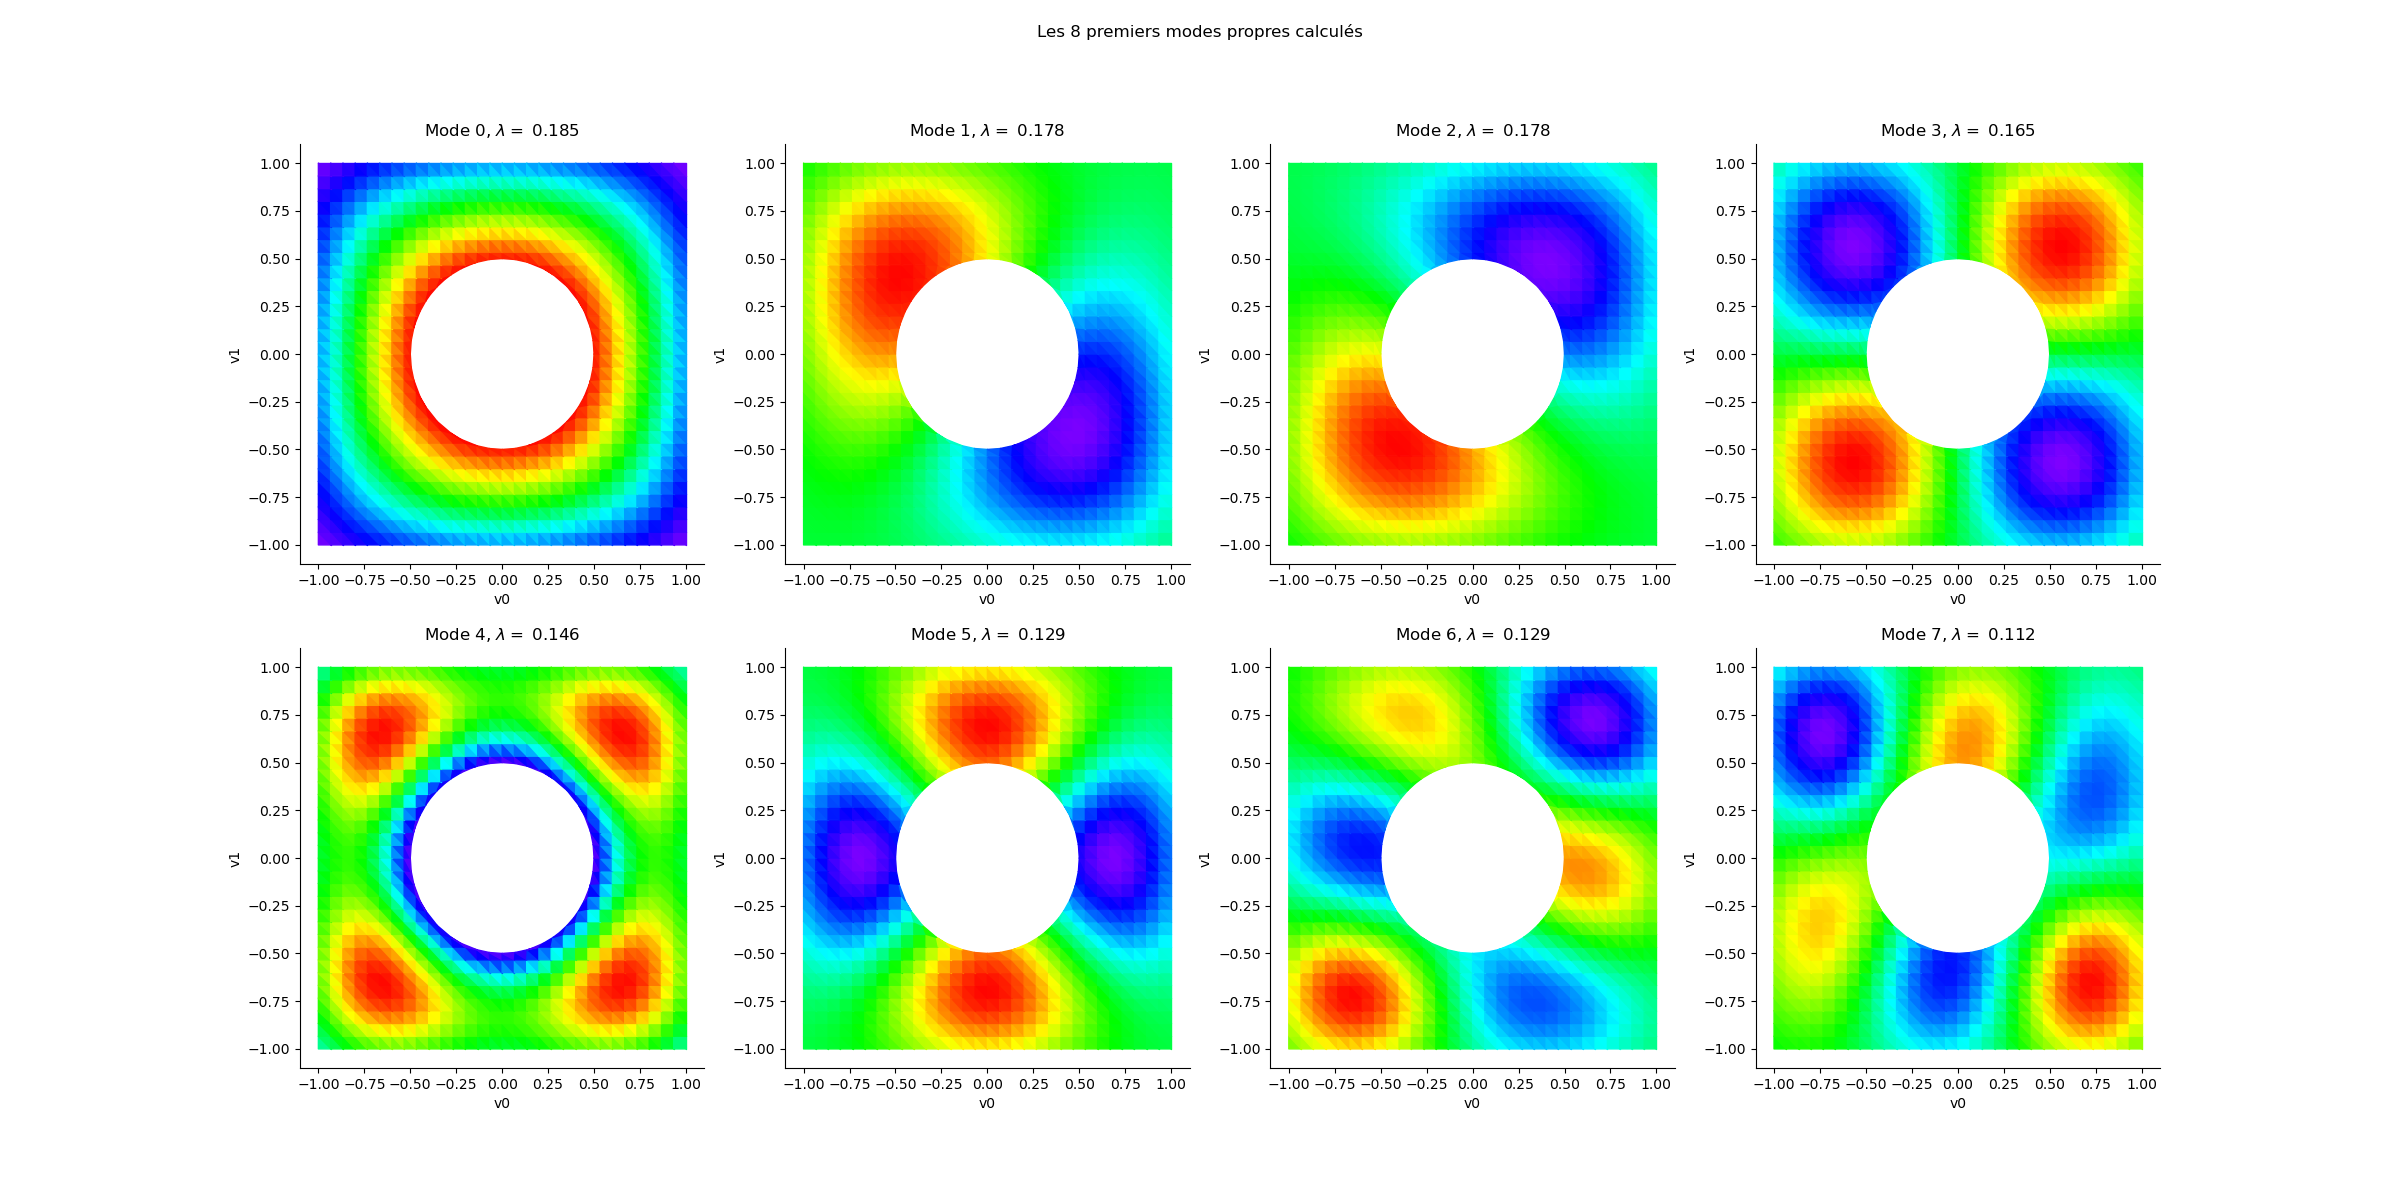

In [4]:
# Simulation gaussienne par résolution du problème de Fredholm (méthode de Nyström)

#Définition de notre base fonctionnelle sur $L^{2}(D,\mathbb{R})$

##On choisira la tensorisation dans \mathbb{R}^inputDim  des polynômes de Legendre de degré inférieur ou égal à un degré 
##maximal fixé (plus de détails dans la partie "A propos du choix de l'approximation de quadrature")

    
#degré maximal
margDegree= 20 

#choix dans la façon d'énumérer les polynômes tensorisés qui permet d'obtenir d'abord les polynômes
#tensorisés dont les degrés partiels sont inférieurs ou égals à 0, puis inférieurs ou égaux à 1 mais 
#dont l'un des degrés partiels vaut 1 et ainsi de suite
enumerateFunction = ot.NormInfEnumerateFunction(inputDim)

#classe qui permet de produire les polynômes de Legendre tensorisés dans \mathbb{R}^inputDim dans l'ordre décrit par 
#enumerateFunction
basis = ot.OrthogonalProductPolynomialFactory([ot.LegendreFactory()]*inputDim,enumerateFunction)

#obtention de la base fonctionnelle de l'ensemble des polynômes de Legendre tensorisés dont les degrés partiels sont
#inférieurs ou égaux à margDegree
functions = [basis.build(i) for i in range((margDegree+1)**inputDim)]

#obtention des points de Gauss et de leur poids associé pour les polynômes de Legendre qui donnent l'approximation de quadrature
#(non effective) qui aura margDegree+1 points de Gauss dans chaque direction
experiment = ot.GaussProductExperiment(basis.getMeasure(), [margDegree+1]*inputDim)


#processus gaussien simulé sur le maillage M
klQuad= KLQAGaussianProcess(ot.MeshDomain(M), ot.Interval(xMin, xMax), C, experiment,functions, False, s, nbOfModes)

#régularisation (peut-être chercher plus de détails sur le propos)
ot.ResourceMap.SetAsScalar("KarhunenLoeveQuadratureAlgorithm-RegularizationFactor", 1e-10)


#réalisation du processus
fieldQuad = klQuad.getRealization()

#résultats de la résolution du problème de Fredholm
resultQuad = klQuad.result

# Visualisation des 8 premiers modes propres
grid = ot.GridLayout(2, 4)
grid.setTitle("Les 8 premiers modes propres calculés")
for i in range(8):
    g = ot.Field(M, resultQuad.getModes()[i](M.getVertices())).draw()
    lambda_i = resultP1.getEigenvalues()[i]
    g.setTitle(f"Mode {i}, $\lambda=$ {lambda_i:.3f}")
    grid.setGraph(i // 4, i % 4, g)
grid

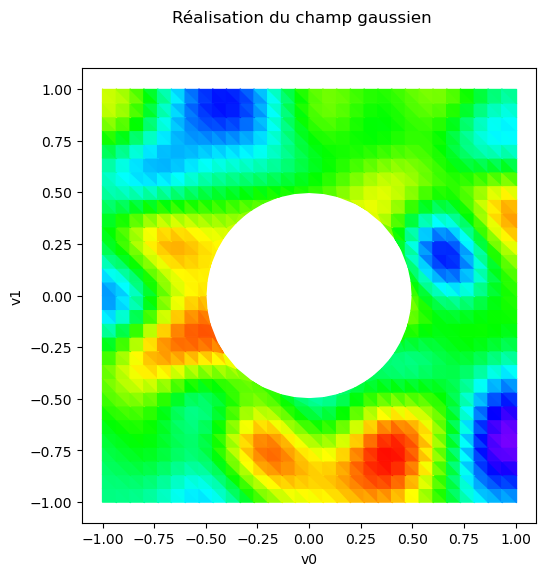

In [5]:
# Visualisation de la simulation effectuée sur le maillage M
g = fieldQuad.draw()
g.setTitle(f"Réalisation du champ gaussien")
view = otv.View(g, (600,600), square_axes=True)

### A propos du choix de l'approximation de quadrature

#### Polynômes orthogonaux par rapport à une mesure de probabilité sur un segment

Soit $I = [a,b]$ un segment de $\mathbb{R}$

Soit $\mu$ une mesure de probabilité sur $I$ de densité positive non nulle et continue sur $I$ notée aussi $\mu$

On peut démontrer alors que l'on dispose d'une unique famille $(P_{i})_{i \in \mathbb{N}}$ de polynômes orthogonaux sur $I$ vérifiant les propriétés suivantes:

- $\forall i  \in \mathbb{N}, P_{i}$ est de degré $i$
- $\forall (i,j) \in \mathbb{N}^2, \int_{a}^{b}  P_{i}(t)P_{j}(t)\mu(t)dt = \delta_{i,j}$ (orthogonalité)
- $\forall i \in \mathbb{N}, P_{i}$ admet $i$ racines distinctes $(\xi_{j}^{i})_{j \in \{1,...,i\}}$  toutes dans $I$ (on appelle ces racines points de Gauss associés à $\mu$ d'ordre i)
- $\forall i \in \mathbb{N}$, on dispose d'une famille $(\lambda_{j}^{i})_{j \in \{1,...,i\}} \in (\mathbb{R}^{*}_{+})^i$ de somme $1$ (on les appelle poids associés à $\mu$ d'ordre $i$)  telle que  pour tout $Q$ polynôme de degré strictement inférieur à $2i$, on a l'égalité: $\int_{a}^{b} Q(t)\mu(t)dt = \displaystyle\sum_{j=1}^{i} \lambda_{j}^{i}Q(\xi_{j}^{i})$ (on note la somme $S_{i}(Q)$)
-pour toute fonction $f$ continue sur $I$, $S_{i}(f) \xrightarrow[i \to \infty]{}  \int_{a}^{b} f(t)\mu(t)dt $ 

Posons pour $i \in \mathbb{N}$, pour $f$ continue sur $I$: 

- $\tilde{S}_{i}(f) = \displaystyle\sum_{j=1}^{i} \omega_{j}^{i}f(\xi_{j}^{i})$ où $\omega_{j}^{i} = \frac{\lambda_{j}^{i}}{\mu(\xi_{j}^{i})} $

Alors du dernier résultat, on déduit que pour $f$ continue sur $I$, $\tilde{S}_{i}(f) \xrightarrow[i \to \infty]{}  \int_{a}^{b} f(t)dt $ 

Par exemple, les polynômes orthogonaux associés à la loi uniforme sur $[-1,1]$ sont les polynômes de Legendre. Dans la littérature mathématique les polynômes de Legendre peuvent être définis légèrement différemment mais à une constante multiplicative près, ce sont les mêmes polynômes.



Si on revient à la méthode de Nyström et si la dimension de $D$ vaut 1 (i.e $n=1$) et que $A = [a,b]$, alors pour $P \in \mathbb{N}^{*}$, on peut choisir comme $(\theta_1, ...,\theta_P)$ les $(P_{i})_{i \in \{0,..,P-1\}}$ les $P$ premiers polynômes orthogonaux qui engendrent l'ensemble des polynômes de degré inférieur ou égal à $P-1$ et pour approximation de quadrature $(\lambda_{j}^{P},\xi_{j}^{P})_{j \in \{1,..,P\}}$ les poids et les points de Gauss associés à la mesure $\mu$ sur $A$ d'ordre $P$. 

On peut remarquer aussi que par un changement de variable affine $g$, de $[a,b]$ vers un autre segment $[c,d]$, il est possible de définir une mesure de probabilité sur $[c,d]$, à densité également, qui est la mesure-image de $\mu$ par $g$, notée $\mu(g)$, et d'obtenir par une mise à l'échelle les polynômes orthogonaux, les points de Gauss et les poids associés à $\mu(g)$ directement à partir des polynômes orthogonaux, des points de Gauss et poids associés à $\mu$. Cette remarque implique par exemple que si l'on connaît les polynômes orthogonaux,les points de Gauss et les poids associés à une loi uniforme sur $[-1,1]$ alors on peut en déduire ceux associés à une loi uniforme quelconque, ce qui peut être avantageux en pratique.


   

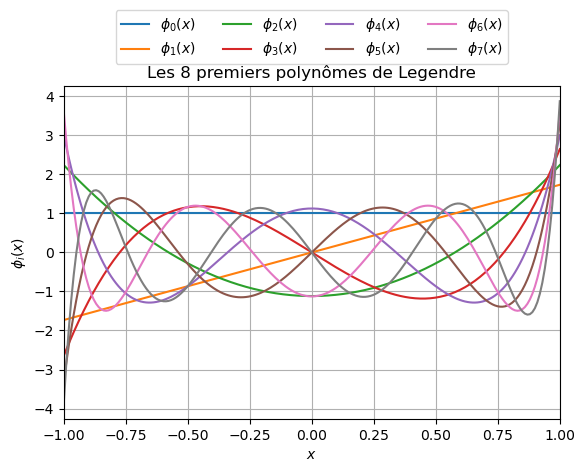

In [6]:
#Visualisation des 8 premiers polynômes de Legendre classés selon leur degré

discretization = [30]*inputDim
mesher = ot.IntervalMesher(discretization)
interval = ot.Interval(xMin, xMax)

mesh = mesher.build(interval)

n_functions = 8
function_factory = ot.LegendreFactory()
functions = [function_factory.build(i) for i in range(n_functions)]
lb = -1.0
ub = 1.0
n_points = 200
meshed_support = np.linspace(lb, ub, n_points)
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(n_functions):
    plt.plot(meshed_support,
             [functions[i](x) for x in meshed_support], lw=1.5,
             label='$\phi_{' + str(i) + '}(x)$')
plt.xlabel('$x$')
plt.ylabel('$\phi_i(x)$')
plt.xlim(lb, ub)
plt.title("Les 8 premiers polynômes de Legendre")
plt.grid()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * 0.9])
plt.legend(loc='upper center', bbox_to_anchor=(.5, 1.25), ncol=4)

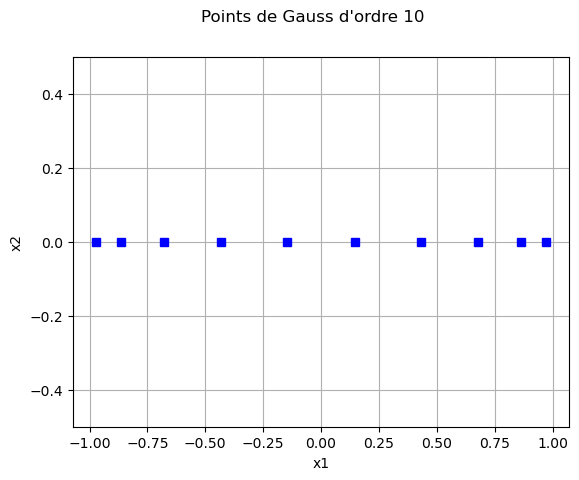

In [7]:
#Visualisation des points de Gauss associé à la loi uniforme sur [-1,1] d'ordre 10

enumerateFunction = ot.NormInfEnumerateFunction(1)
basis = ot.OrthogonalProductPolynomialFactory([ot.LegendreFactory()],enumerateFunction)
experiment = ot.GaussProductExperiment(basis.getMeasure(), [10])
sample1 = experiment.generate()
sample = ot.Sample(10,2)
for i in range(10):
    sample[i,0] = sample1[i,0]

graph = ot.Graph("Points de Gauss d'ordre 10", "x1", "x2", True, "")

# Create the cloud
cloud = ot.Cloud(sample, "blue", "fsquare", "")

# Then, draw it
graph.add(cloud)

v = otv.View(graph)

v


#### Polynômes orthogonaux par rapport à une mesure de probabilité sur un pavé de $\mathbb{R}^n$

Il est possible de généraliser sous certaines conditions le propos de la partie précédente.

Soient $\mu_1,\dots, \mu_n$ $n$ mesures de probabilité sur des segments $[l_1,u_1],\dots,[l_n,u_n]$ respectivement, de densité non nulle et continue. 

On note:


- $\mu$ la mesure produit des $\mu_i$ qui est une mesure de probabilité sur le pavé $A = [l_1,u_1] \times \dots \times [l_n,u_n] \subset \mathbb{R}^n $. De plus $\mu$ est à densité continue telle que $\forall (x_1,\dots,x_n) \in A, \mu(x_1,\dots,x_n) = \mu_{1}(x_1)\dots\mu_{n}(x_n)$


- pour $i \in \{1,\dots,n\}$, $(P_{j}^{i})_{j \in \mathbb{N}},((\xi_{j}^{i,k})_{j \in \{1,\dots,k\}})_{k \in \mathbb{N}},((\lambda_{j}^{i,k})_{j \in \{1,\dots,k\}})_{k \in \mathbb{N}}$ les polynômes orthogonaux, les points de Gauss et les poids associés à la mesure $\mu_i$ 


- pour $ m = (m_1,\dots,m_n) \in \mathbb{N}^n$, pour $(x_1,\dots,x_n) \in \mathbb{R}^n,  P_{m}(x_1,\dots,x_n) = P_{m_1,\dots,m_n}(x_1,\dots,x_n)=P_{m_1}^{1}(x_1)\dots P_{m_n}^{n}(x_n) $ (polynôme orthogonal associé à $\mu$ d'ordre $m$)


- pour $ k = (k_1,\dots,k_n) \in \mathbb{N}^n$, pour $j=(j_1,\dots,j_n) \in \{1,..,k_1\} \times \dots \times \{1,\dots,k_n\} , \lambda_{j}^{k} = \lambda_{j_1,\dots,j_n}^{k_1,\dots,k_n} = \lambda_{j_1}^{1,k_1}\dots \lambda_{j_n}^{n,k_n}$ (poids associé à $\mu$ d'ordre $k$ d'index $j$)


- pour $ k = (k_1,\dots,k_n) \in \mathbb{N}^n$, pour $j=(j_1,\dots,j_n) \in \{1,\dots,k_1\} \times \dots \times \{1,\dots,k_n\}, \xi_{j}^{k} = \xi_{j_1,\dots,j_n}^{k_1,\dots,k_n} = (\xi_{j_1}^{1,k_1},\dots,\xi_{j_n}^{n,k_n}) \in \mathbb{R}^n $ (point de Gauss associé à $\mu$ d'ordre $k$ d'index $j$)

- pour $i \in \{1,\dots,n\}, k \in \mathbb{N}, j \in \{1,\dots,k\}, \eta^{i,k}_{j} = \frac{\lambda^{i,k}_{j}}{\mu_{i}(\xi^{i,k}_{j})} $

- pour $k= (k_1,\dots,k_n) \in \mathbb{N}^n$, pour $j=(j_1,\dots,j_n) \in \{1,\dots,k_1\} \times \dots \times \{1,\dots,k_n\}, \eta_{j}^{k} = \eta_{j_1,\dots,j_n}^{k_1,\dots,k_n} = \eta_{j_1}^{1,k_1}\dots \eta_{j_n}^{n,k_n} = \frac{\lambda_{j}^{k}}{\mu(\xi_{j}^{k})} $

(on dit que ces notations sont obtenues par tensorisation dans $\mathbb{R}^n$)


Alors sous ces notations, on peut obtenir des résultats tout à fait similaires au cas de la dimension $1$

- pour $ m = (m_1,\dots,m_n) \in \mathbb{N}^n$, $P_{m}$ est un polynôme de degré total $|m| = \displaystyle\sum_{j=1}^{n} m_i $ ($m_i$ est le $i$ème degré partiel de $P_{m}$)

- $\forall (m,p) \in (\mathbb{N}^n)^2, \int_A  P_{m}(t)P_{p}(t)\mu(t)dt = \delta_{m,p}$ (orthogonalité)

- pour  $m = (m_1,\dots,m_n) \in \mathbb{N}^n$, pour tout polynôme $Q$ tel que $\forall i \in \{1,\dots,n\}$  le $i$ème degré partiel de $P$ est strictement inférieur à $2m_i$, 

  $ \int_{A} Q(t)\mu(t)dt = \displaystyle\sum_{\substack{j \in (\mathbb{N}^{*})^n \\ j \leq m}} \lambda_{j}^{m}Q(\xi_{j}^{m})  $ (on note la somme $S_m(Q)$) 

- pour toute fonction $f$ continue sur $A$, $S_{m}(f) \xrightarrow[m_i \to \infty ]{}  \int_{A} f(t)\mu(t)dt $ 
  
  (preuve de ce point fondée sur le théorème de Stone-Weierstrass)
  
  
  

Posons pour $m \in \mathbb{N}^n$, pour $f$ continue sur $A$: 

- $\tilde{S}_{m}(f) = \displaystyle\sum_{\substack{j \in (\mathbb{N}^{*})^n \\ j \leq m}} \eta_{j}^{m}f(\xi_{j}^{m})$

Alors du dernier résultat, on déduit que pour $f$ continue sur $A$, $\tilde{S}_{m}(f) \xrightarrow[m_i \to \infty]{}  \int_A f(t)dt $ 


Si on revient à la méthode de Nyström, on rappelle que $A = [l_1, u_1] \times \dots \times [l_n, u_n]$ et on suppose que la mesure $\mu$ est la mesure $\mu$ produit dont on a décrit précédemment ses diverses propriétés. Alors pour $N \in \mathbb{N}$, on peut choisir comme $(\theta_1,\dots,\theta_{(N+1)^n})$ les $(P_{m})_{m \leq (N,\dots,N)}$ les $(N+1)^n$ polynômes orthogonaux qui engendrent l'ensemble des polynômes dont tous les degrés partiels sont inférieurs ou égaux à $N$ et pour approximation de quadrature $(\lambda_{j}^{(N+1,\dots,N+1)},\xi_{j}^{(N+1,\dots,N+1)})_{j \in \{1,\dots,N+1\}^n}$. Ce choix d'approximation permet ainsi de faire en sorte que l'intégrale sur $A$ du produit de deux $\theta_i$ soit exactement égale à l'approximation de quadrature effective de l'intégrale dans le cas où les $\mu_i$ seraient toutes des lois uniformes sur leur segment $[l_i, u_i]$ respectif. Si en plus $A=D$, alors la matrice de Gram des fonctions de bases $(\psi_{k})_{k\in \{1,\dots,(N+1)^nd\}}$ dans $L^2(D,\mathbb{R}^d)$, $\Theta^{T} W \Theta$, vaut exactement $I_{(N+1)^nd}$ 
                 
                 
On dira juste pour conclure qu'il existe d'autres façons pour obtenir une approximation de quadrature comme la méthode de Monte-Carlo fondée sur la connaissance de la mesure $\mu$ et la loi des grands nombres.
                 
                 
(Sources: https://math.unice.fr/~cazanave/fr/capesM2/polynomesorthogonaux.pdf + Openturns+ https://core.ac.uk/download/pdf/236628949.pdf (description explicite de la méthode de Bubnov-Galerkin))    

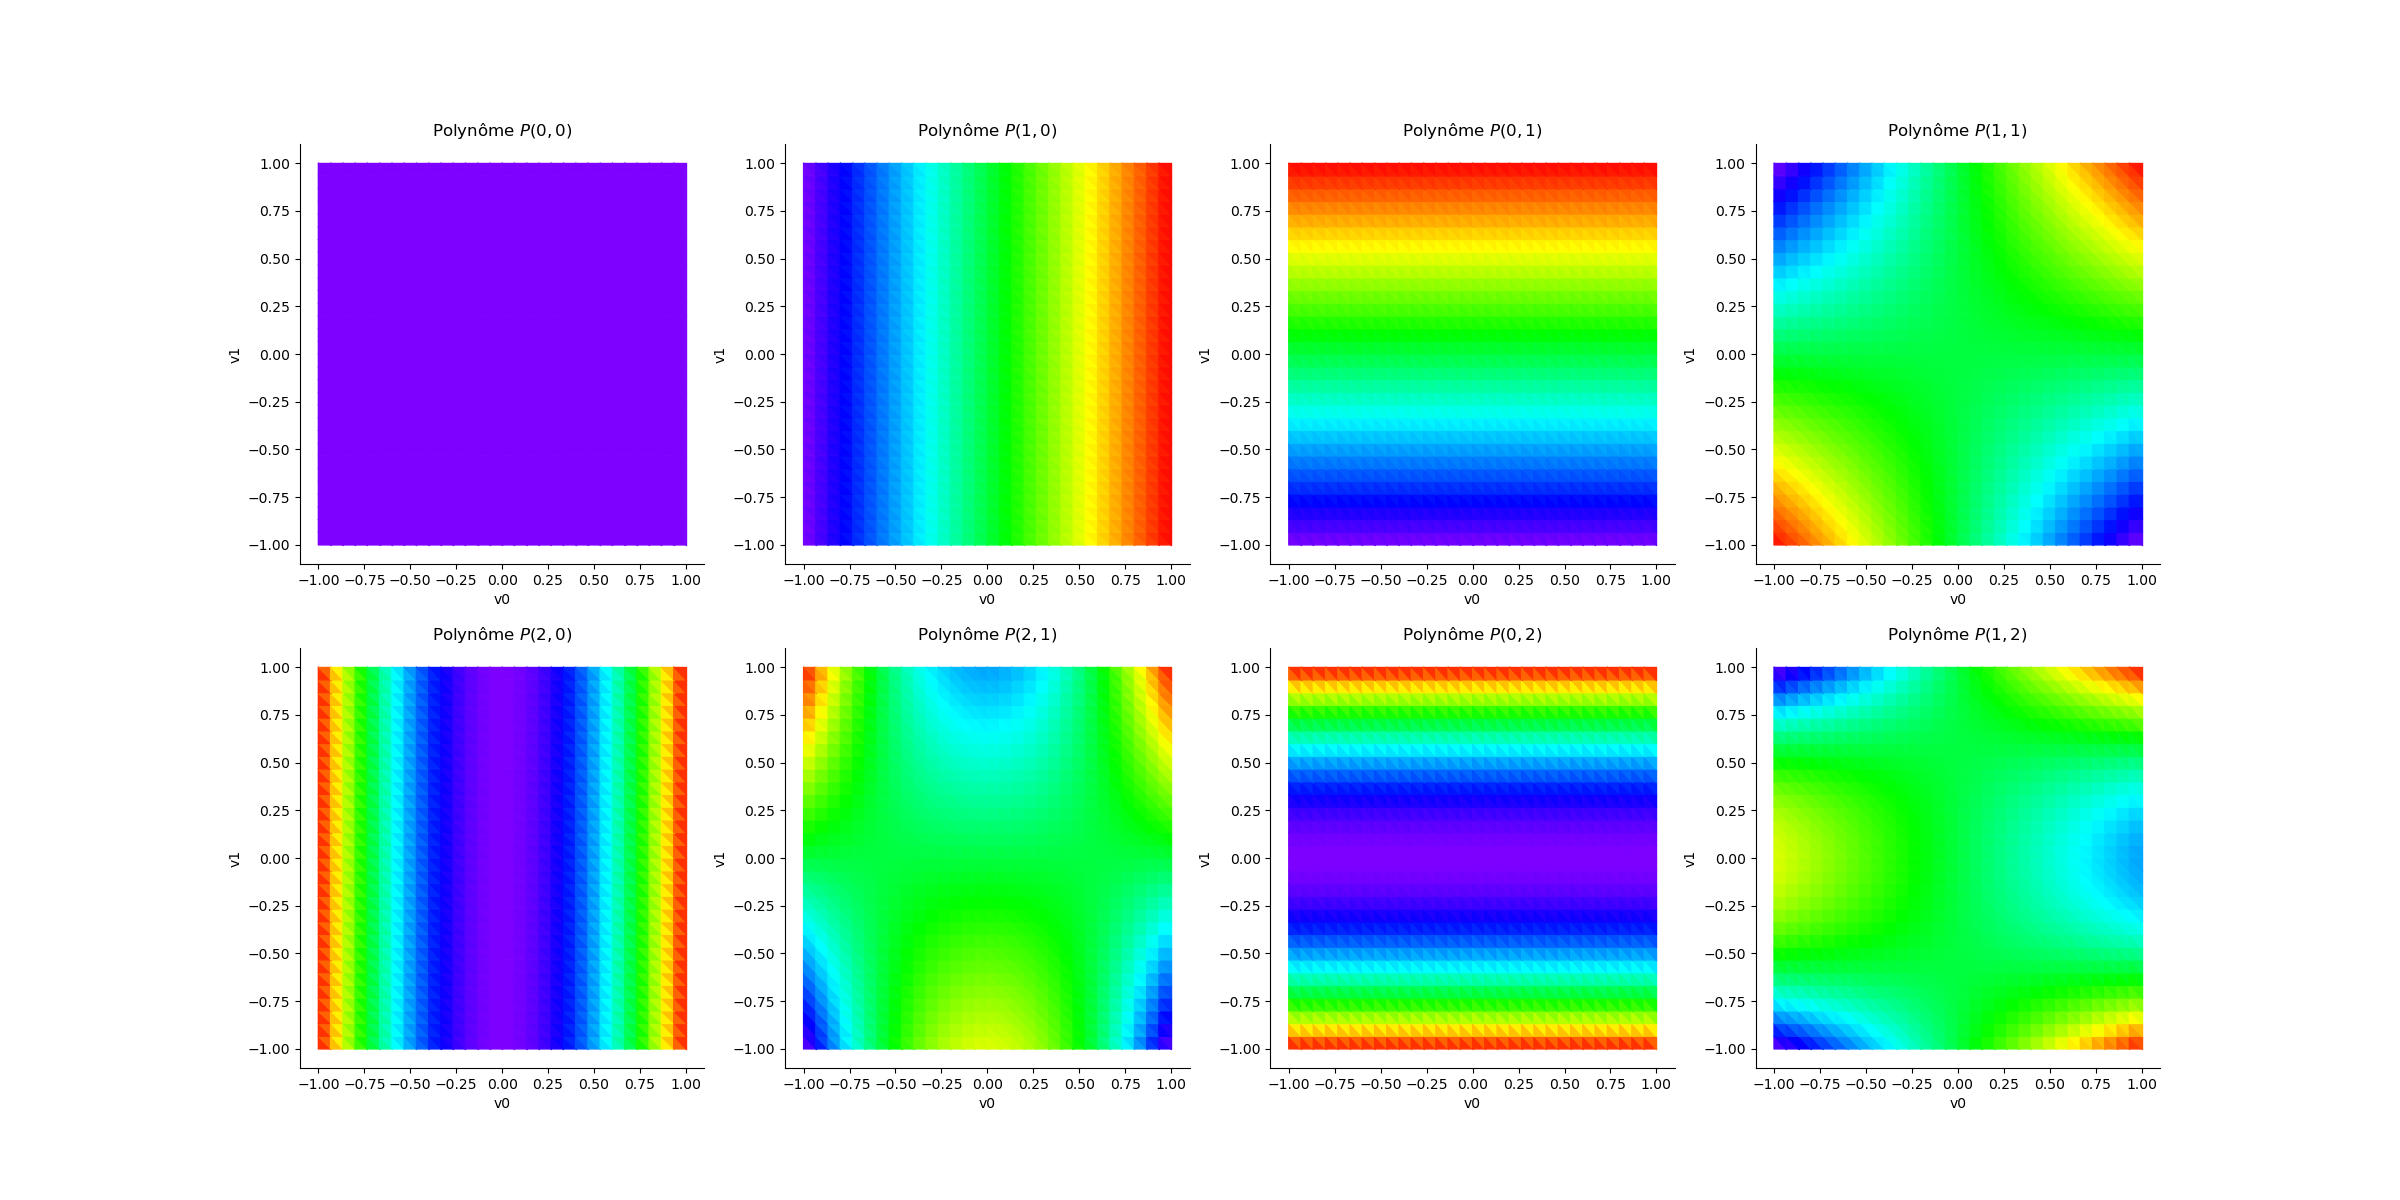

In [10]:
#Visualisation de 8 polynômes orthogonaux de Legendre tensorisés dans R^2

mesher = ot.IntervalMesher([30]*inputDim)
interval = ot.Interval(xMin, xMax) 
mesh = mesher.build(interval)

enumerateFunction = ot.NormInfEnumerateFunction(inputDim)
basis = ot.OrthogonalProductPolynomialFactory([ot.LegendreFactory()]*inputDim,enumerateFunction)
functions = [basis.build(i) for i in range(8)]

grid = ot.GridLayout(2, 4)
for i in range(8):
    g = ot.Field(mesh, functions[i](mesh.getVertices())).draw()
    lambda_i = resultP1.getEigenvalues()[i]
    g.setTitle(f"Polynôme $P({enumerateFunction(i)[0]},{enumerateFunction(i)[1]})$")
    grid.setGraph(i // 4, i % 4, g)
grid


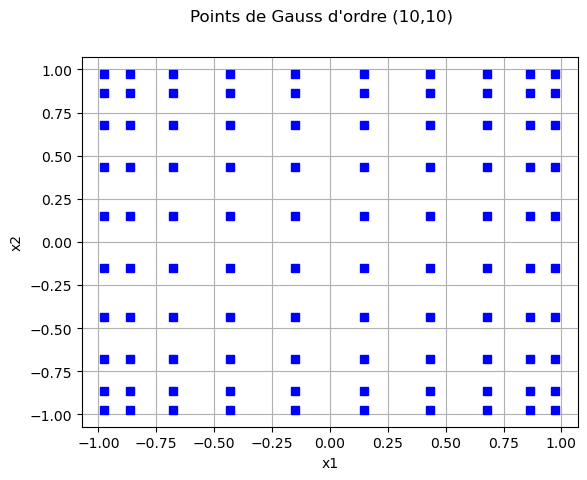

In [9]:
#Visualisation des points de Gauss associés à la loi uniforme sur [-1,1] tensorisée dans [0,1]^2 d'ordre (10,10)

enumerateFunction = ot.NormInfEnumerateFunction(inputDim)
basis = ot.OrthogonalProductPolynomialFactory([ot.LegendreFactory()]*inputDim,enumerateFunction)
experiment = ot.GaussProductExperiment(basis.getMeasure(), [10]*inputDim)
sample = experiment.generate()

graph = ot.Graph("Points de Gauss d'ordre (10,10)", "x1", "x2", True, "")

cloud = ot.Cloud(sample, "blue", "fsquare", "")

graph.add(cloud)

v = otv.View(graph)

v